# Magnetic Field Simulation with Biot-Savart Law

This notebook demonstrates the simulation and visualization of magnetic fields generated by various coil configurations using the Biot-Savart law. The following steps are performed:

1. **Mesh Grid Generation**: A 3D mesh grid is created to evaluate the magnetic field at various points in space.
2. **Magnetic Field Calculation**: The Biot-Savart law is applied to compute the magnetic field for different coil geometries and currents.
3. **Visualization**: The magnetic field components are visualized in 2D slices for better understanding.

### Dependencies
- `numpy` for numerical computations.
- `einops` for tensor rearrangement.
- `matplotlib` for plotting.
- `PyBiotSavart` for Biot-Savart law implementation.

### Coil Configurations
The notebook explores several coil configurations:
- Circular coil in the XY plane.
- Spiral coil with varying radius.
- Helical coil along the Z-axis.
- Helical coil with varying radius along the Z-axis.
- Toroidal coil with a sinusoidal perturbation.

Each configuration is simulated and visualized to understand the resulting magnetic field distribution.

In [1]:
# Import necessary libraries and modules
from PyBiotSavart import BiotSavart
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt

In [2]:
# Define the bounds and resolution of the 3D mesh grid
xmin,xmax,nx = -25e-2,25e-2,51
ymin,ymax,ny = -25e-2,25e-2,51
zmin,zmax,nz = -25e-2,25e-2,51

# Generate 3D mesh grid
def Gen_MeshGrid(xmin,xmax,nx,ymin,ymax,ny,zmin,zmax,nz):
    x = np.linspace(xmin,xmax,nx,endpoint=True)
    y = np.linspace(ymin,ymax,ny,endpoint=True)
    z = np.linspace(zmin,zmax,nz,endpoint=True)

    xx,yy,zz = np.meshgrid(x,y,z, indexing='ij')
    return np.stack([xx,yy,zz],axis=-1)

# Vectorize the mesh grid for computation
mesh_grid = Gen_MeshGrid(xmin,xmax,nx,ymin,ymax,ny,zmin,zmax,nz)
vectorized_grid = rearrange(mesh_grid,"x y z p -> (x y z) p")

In [3]:
# Function to simulate and plot the magnetic field
def sim_and_plot(coil, current, pts):
    # Compute the magnetic field using the Biot-Savart law
    B = BiotSavart(coil, current, vectorized_grid)
    # Reshape the magnetic field back to the mesh grid shape
    mesh_B = rearrange(B, "(x y z) p -> x y z p", x=nx, y=ny, z=nz)

    # Plot the coil in 3D space
    plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot3D(coil[:, 0], coil[:, 1], coil[:, 2])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)

    # Visualize the magnetic field components in 2D slices
    for i, axis in enumerate(["XY", "XZ", "YZ"]):
        plt.figure(figsize=(14, 3))
        for j in range(3):  # Iterate over the x, y, z components of the field
            plt.subplot(1, 3, j + 1)
            if axis == "XY":
                plt.imshow(mesh_B[:, :, 24, j], cmap="bwr")
            elif axis == "XZ":
                plt.imshow(mesh_B[:, 24, :, j], cmap="bwr")
            elif axis == "YZ":
                plt.imshow(mesh_B[24, :, :, j], cmap="bwr")
            plt.clim(-5e-5, 5e-5)
            plt.colorbar()

+ Example 1: Circular coil in the XY plane

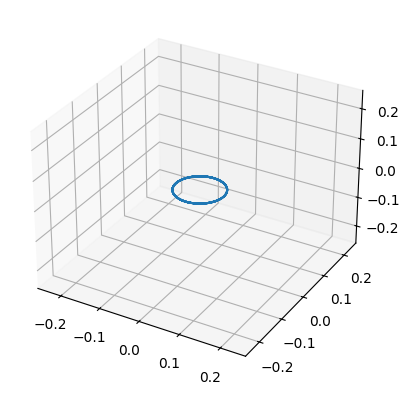

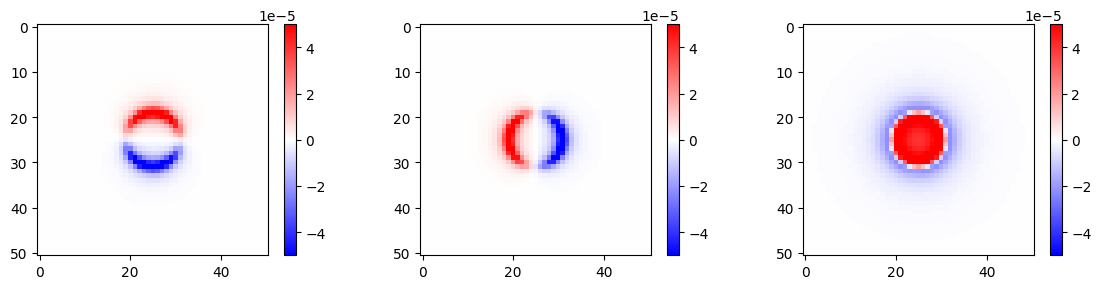

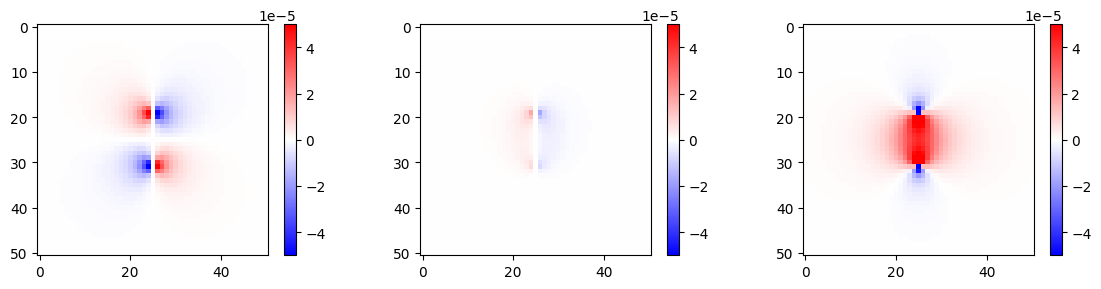

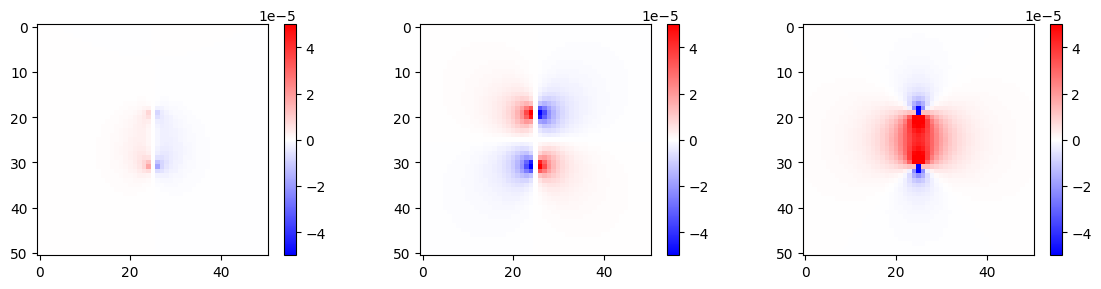

In [5]:
coil = np.zeros((200,3))
coil[:,2] = 0
coil[:,0], coil[:,1] = np.cos(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2, np.sin(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2

current = 1
sim_and_plot(coil,current,vectorized_grid)

+ Example 2: Spiral coil with varying radius

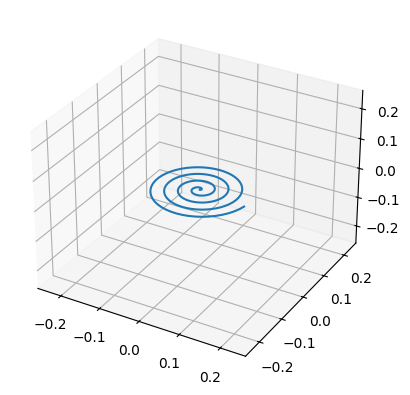

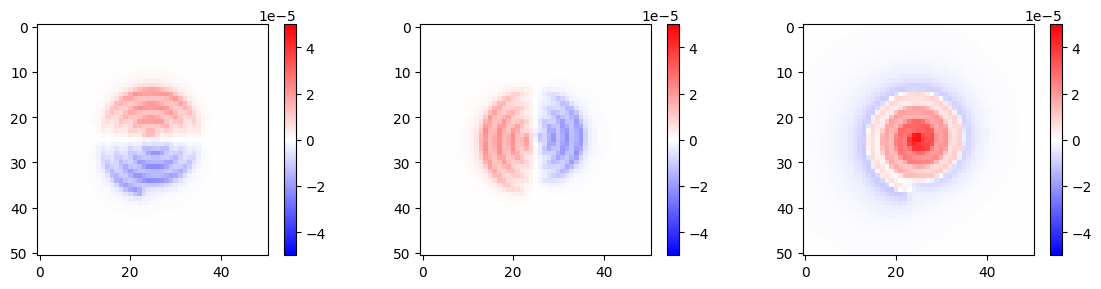

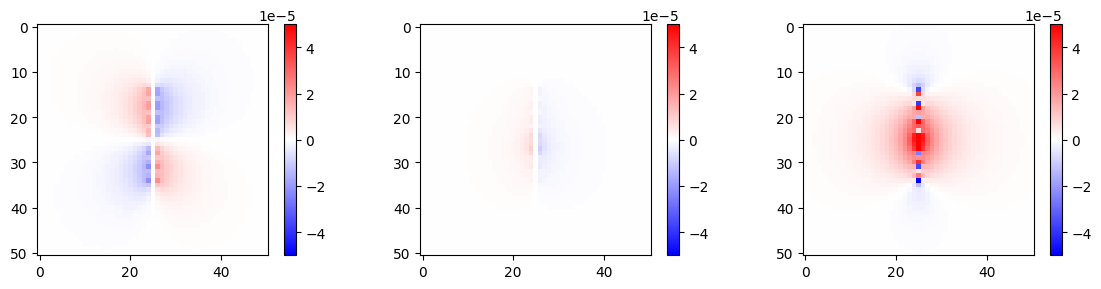

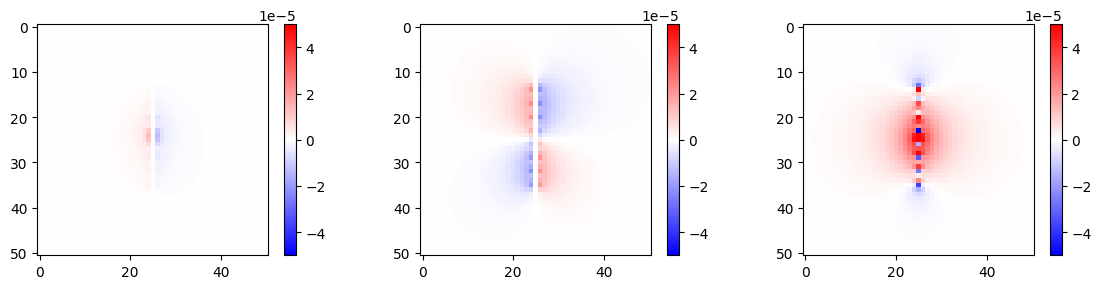

In [11]:
coil = np.zeros((200,3))
coil[:,2] = 0
coil[:,0], coil[:,1] = np.linspace(0,2,coil.shape[0])*np.cos(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2, np.linspace(0,2,coil.shape[0])*np.sin(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2

current = 1

sim_and_plot(coil,current,vectorized_grid)

+ Example 3: Helical coil along the Z-axis

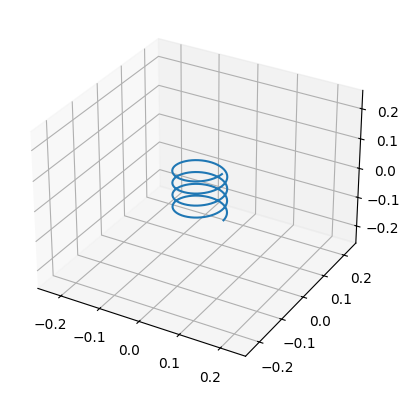

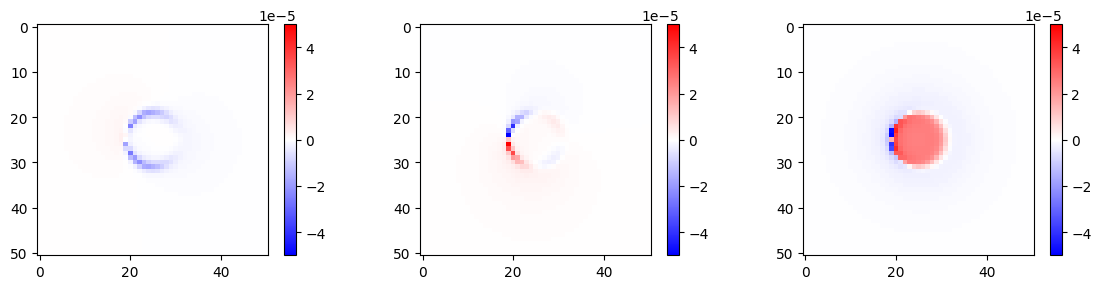

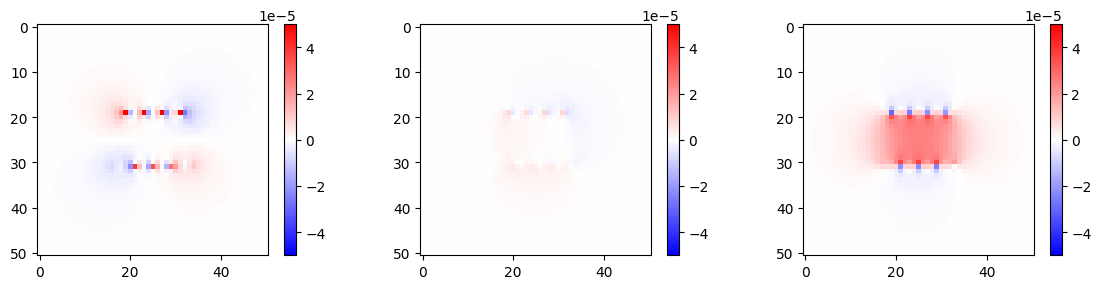

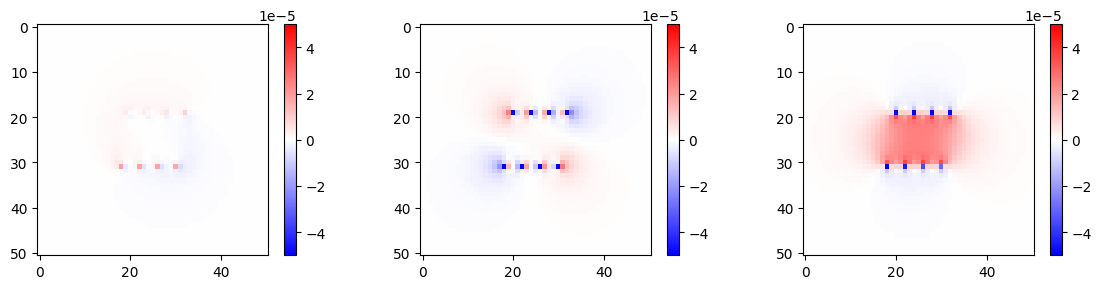

In [7]:
coil = np.zeros((200,3))
coil[:,2] = np.linspace(-8e-2,8e-2,coil.shape[0],endpoint=True)
coil[:,0], coil[:,1] = np.cos(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2, np.sin(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2

current = 1

sim_and_plot(coil,current,vectorized_grid)

+ Example 4: Helical coil with varying radius along the Z-axis

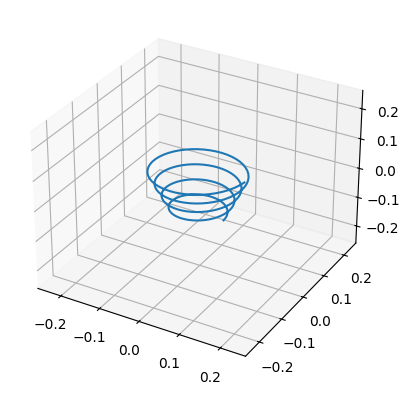

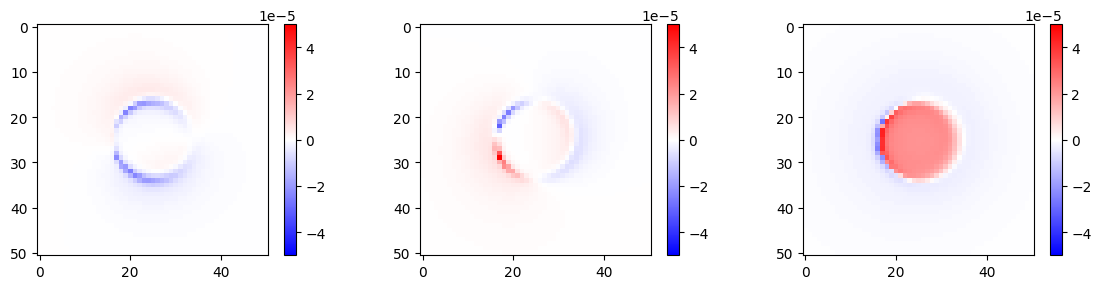

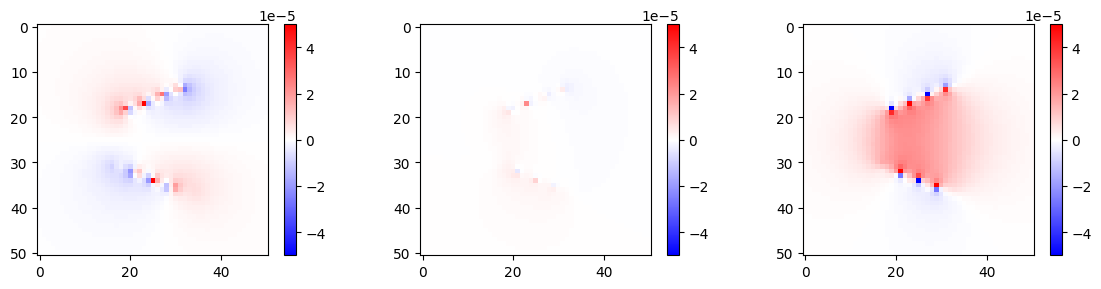

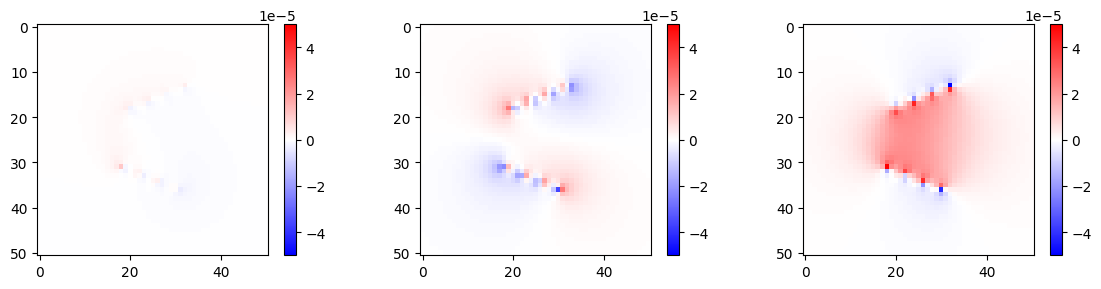

In [8]:
coil = np.zeros((200,3))
coil[:,2] = np.linspace(-8e-2,8e-2,coil.shape[0],endpoint=True)
coil[:,0], coil[:,1] = np.linspace(1,2,coil.shape[0])*np.cos(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2, np.linspace(1,2,coil.shape[0])*np.sin(np.linspace(0,8*np.pi,coil.shape[0],endpoint=False))*6e-2

current = 1

sim_and_plot(coil,current,vectorized_grid)


+ Example 5: Toroidal coil with sinusoidal perturbation

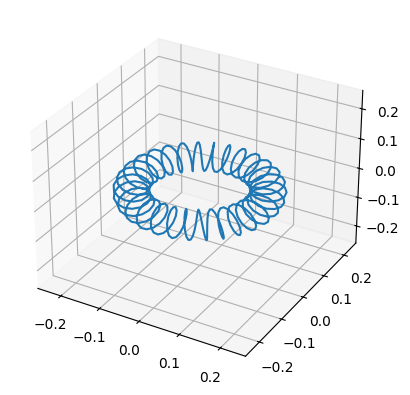

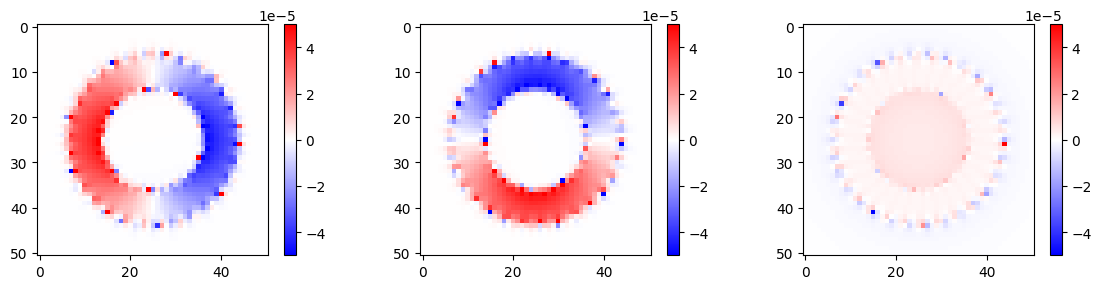

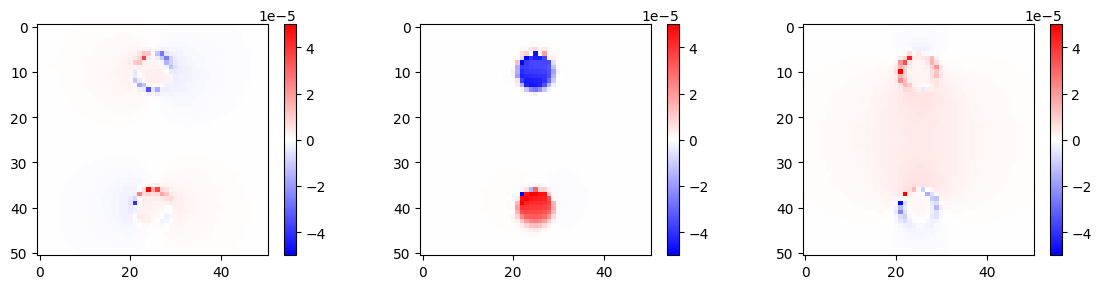

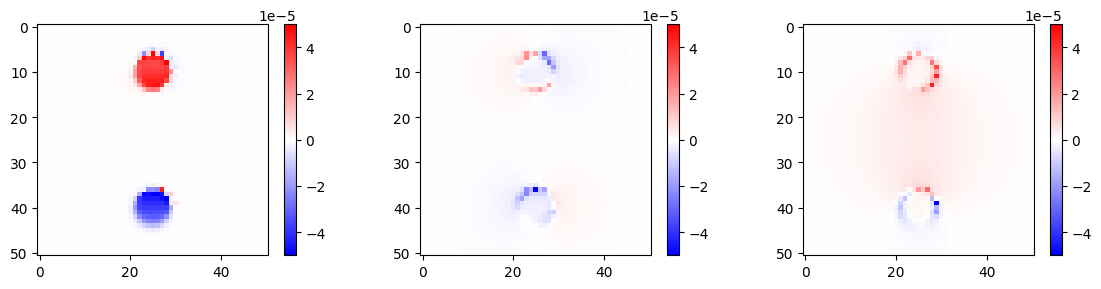

In [9]:
r0 = 15e-2
r1 = 4e-2

coil = np.zeros((400,3))
theta = np.linspace(0,2*np.pi,coil.shape[0])
alpha = np.linspace(0,60*np.pi,coil.shape[0])

coil[:,2] = r1*np.cos(alpha)
coil[:,0] = (r0+r1*np.sin(alpha))*np.cos(theta)
coil[:,1] = (r0+r1*np.sin(alpha))*np.sin(theta)

current = 1

sim_and_plot(coil,current,vectorized_grid)